In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
df=pd.read_csv(r'C:\Users\Sbaix\Desktop\qiancheng_data.csv',encoding='gbk')

In [3]:
df.head()

,title,company_name,salary,company_site,experience_required,edu_required,release_time,company_welfare,job_info,company_location,company_info
0,Python开发工程师,联合永道（上海）信息技术有限公司,1-1.5万/月,北京-顺义区,无工作经验,招3人,12-06发布,"['五险一金', '免费班车', '员工旅游', '交通补贴', '餐饮补贴', '工作环境...","['1.精通Python', '2.熟悉SQL语言，能熟练使用mysql，了解常用的SQL性...",'北京市顺义区后沙峪 中国航信高科技产业园',联合永道是一家专注于教育领域软件产品研发与销售的高新技术企业，主要从事教育软件产品的开发及应...
1,Python实习-机器学习方向,寰宇优才教育科技（北京）有限公司,0.8-1万/月,北京-朝阳区,无工作经验,招6人,12-06发布,"['五险一金', '补充医疗保险', '补充公积金', '员工旅游', '交通补贴', '出...","['（能力不足，但有Python开发意向者，可放宽要求提供实习岗位）', '', '1.本科...",'新文化大街',寰宇优才教育科技（北京）有限公司
2,Python开发工程师,北京万维盈创科技发展有限公司,0.8-1.5万/月,北京-昌平区,无工作经验,本科,12-06发布,"['年终奖金', '员工旅游', '定期体检', '专业培训', '交通补贴', '通讯补贴...","['岗位职责：', '1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划；', '2....",'北七家镇TBD云集中心',北京万维盈创科技发展有限公司（简称万维盈创）是一家专业的环保物联网产品与解决方案提供商。公司...
3,Python开发工程师,北京学神科技有限公司,1-1.5万/月,北京-昌平区,3-4年经验,大专,12-06发布,"['弹性工作', '年终奖金', '绩效奖金', '专业培训', '周末双休']","['', '岗位职责：', '1.围绕项目开展教学工作；', '2.给学生讲授知识点技术点以...",'昌平南邵',“学神IT教育”（网址：www.xuegod.cn）是北京学神科技有限公司旗下的在线教育品牌...
4,Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066),北京融联世纪信息技术有限公司,3-5万/月,北京,无工作经验,本科,12-06发布,[],"['1.负责RC系统整体规划工作,负责团队工作；2.负责风控系统在线服务的设计、优化和研发工...",'时代网络大厦',融360（www、rong360、com）北京融联世纪信息技术有限公司，成立于2011年10...


In [4]:
df.size

63151

In [5]:
df.shape

(5741, 11)

In [6]:
df.dtypes

title                  object
company_name           object
salary                 object
company_site           object
experience_required    object
edu_required           object
release_time           object
company_welfare        object
job_info               object
company_location       object
company_info           object
dtype: object

# 薪资分布

In [7]:
salary_df=df[df.salary.notnull()]

In [8]:
salary_df.size

57057

In [9]:
salary_df.salary.value_counts()


1-1.5万/月      646
1.5-2万/月      468
1-2万/月        342
2-4万/月        275
1.5-2.5万/月    255
1.5-3万/月      254
0.8-1万/月      179
2-2.5万/月      170
0.8-1.5万/月    153
2-3万/月        125
2.5-3万/月      125
2.5-5万/月      109
6-8千/月         98
3-4万/月         74
2-3.5万/月       67
0.8-1.2万/月     60
0.8-1.6万/月     53
2.5-3.5万/月     53
0.6-1万/月       51
3-5万/月         48
3-6万/月         46
1.2-2万/月       43
2.5-4万/月       38
0.6-1.2万/月     35
1-3万/月         32
1-1.8万/月       31
2-3千/月         31
4.5-6千/月       30
4-5万/月         30
1.2-2.4万/月     28
             ... 
25-30万/年        1
1.5-3.2万/月      1
3.5-7万/年        1
7-8.5千/月        1
1.6-4万/月        1
0.6-1.7万/月      1
1.5-4千/月        1
6-12万/年         1
0.8-1.7万/月      1
5.2-8.2千/月      1
35-60万/年        1
1.7-2.5万/月      1
1.5-2.9万/月      1
17-30万/年        1
7-10万/月         1
1.6-1.8万/月      1
1.5-6万/月        1
25-50万/年        1
4.5-6.5千/月      1
1.8-2.4万/月      1
2-3.9万/月        1
5-10万/年         1
1-2.2万/月        1
3-3.5万/月        1
2.8-3.3万/月

# 北京那些地区提供的岗位比较多?

In [10]:
company_site_df=df[df.company_site.str.startswith('北京')]

In [11]:
company_site_df.size

61116

In [12]:
company_site_df.company_site.value_counts()

北京         1957
北京-海淀区     1727
北京-朝阳区     1053
北京-西城区      174
北京-昌平区      164
北京-东城区      134
北京-丰台区      130
北京-大兴区      109
北京-石景山区      41
北京-通州区       23
北京-顺义区       20
北京-房山区       19
北京-门头沟区       3
北京-延庆区        2
Name: company_site, dtype: int64

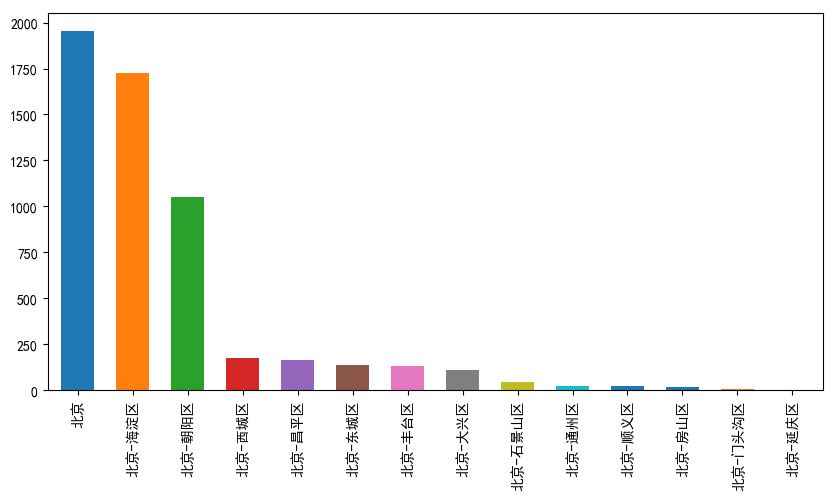

In [13]:
plt.figure(figsize=(10,5),dpi=100)
company_site_df['company_site'].value_counts().plot.bar(width=0.6)

# 工作年限要求?

In [14]:
df.size

63151

In [15]:
df.experience_required.value_counts()

无工作经验      2001
3-4年经验     1740
2年经验        878
5-7年经验      699
1年经验        360
8-9年经验       39
10年以上经验      24
Name: experience_required, dtype: int64

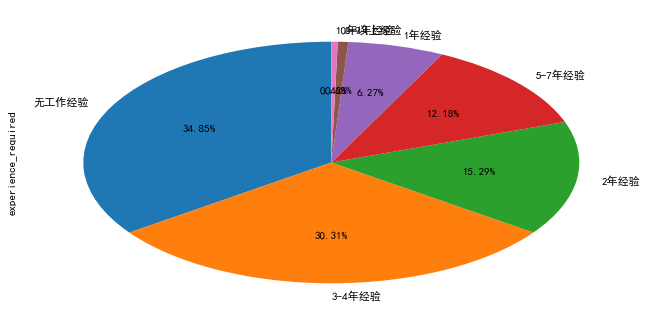

In [44]:
plt.figure(figsize=(10,5),dpi=80)

df['experience_required'].value_counts().plot.pie(autopct='%1.2f%%',
       shadow=False,startangle=90)


# 公司一般会提供什么福利诱惑

In [17]:
df.company_welfare.head()

0    ['五险一金', '免费班车', '员工旅游', '交通补贴', '餐饮补贴', '工作环境...
1    ['五险一金', '补充医疗保险', '补充公积金', '员工旅游', '交通补贴', '出...
2    ['年终奖金', '员工旅游', '定期体检', '专业培训', '交通补贴', '通讯补贴...
3             ['弹性工作', '年终奖金', '绩效奖金', '专业培训', '周末双休']
4                                                   []
Name: company_welfare, dtype: object

In [18]:
welfare_list=df.company_welfare

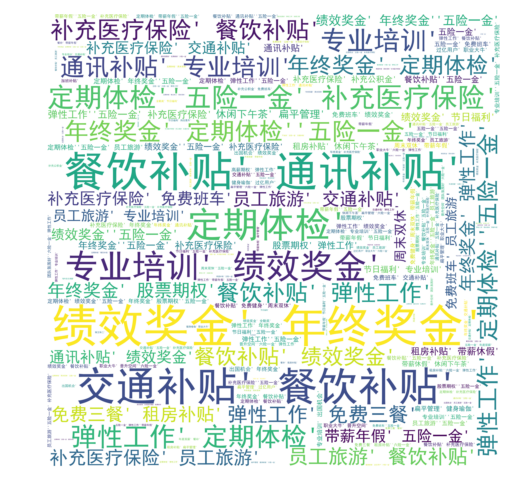

In [19]:
text=''
for i in welfare_list:
    #print(str(i))
    text=text+str(i).replace('[','').replace(']','')
#text=df.company_welfare
plt.figure(figsize=(15,6),dpi=100)
wc=WordCloud(font_path='./fonts/simhei.ttf',background_color='white',width=3000,height=3000)
wc.generate(text)

plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

plt.show()

# 需要的技能

In [20]:
job_df=df.job_info
job_df.loc[20]

#job_df.size

"['1.Web后端业务逻辑层、数据层的实现；', '\\xa0\\xa0', '2.负责Web后端功能实现并进行测试及部署。', '\\xa0\\xa0', '', '\\xa0\\xa0', '岗位要求：', '\\xa0\\xa0', '1.统招全日制本科及以上学历，计算机及相关专业毕业，扎实的计算机基础知识；', '\\xa0\\xa0', '2.2年以上Web开发经验，精通Python程序设计，熟悉Flask、Django或Tornado等框架；', '\\xa0\\xa0', '3.熟悉Linux操作环境，熟练使用Mysql、Nginx、MongoDB、Redis；', '\\xa0\\xa0', '4.良好的程序分析设计能力，文档管理能力及编程习惯；', '\\xa0\\xa0', '']"

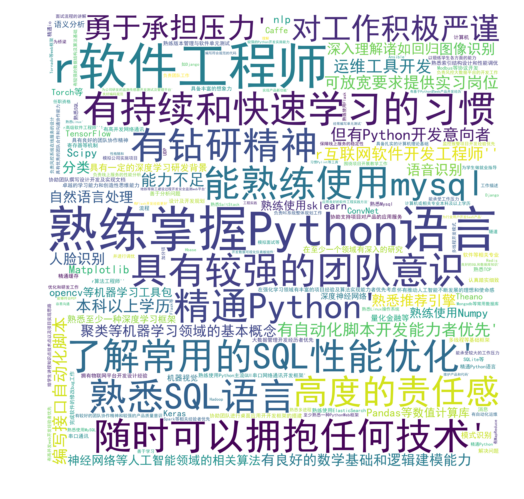

In [21]:
job_text=''
for n in job_df:
    #print(str(n))
    job_text=job_text+str(n).replace('[','').replace(']','').replace('\\n','').replace('\\t','').replace('\\xa0','').replace('岗位职责','').replace('职能类别','').replace('任职要求','').replace('工作职责','').replace('岗位要求','')

plt.figure(figsize=(15,6),dpi=100)
wc=WordCloud(font_path='./fonts/simhei.ttf',background_color='white',width=3000,height=3000)
wc.generate(job_text[:2000])

plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

plt.show()

# 薪资和地区的关系

In [22]:
company_site_df.groupby(by='company_site')['salary'].value_counts()

company_site  salary    
北京            1-1.5万/月      153
              1.5-2万/月      119
              2-4万/月        117
              1-2万/月         93
              2.5-5万/月       85
              1.5-3万/月       60
              1.5-2.5万/月     49
              0.8-1万/月       47
              0.8-1.5万/月     34
              2-2.5万/月       29
              2.5-3万/月       29
              6-8千/月         28
              3-6万/月         23
              0.8-1.6万/月     22
              2.5-4.5万/月     21
              2-3.5万/月       19
              2.5-3.5万/月     18
              2-3万/月         17
              3-4万/月         16
              2.5-4万/月       15
              0.6-1万/月       14
              2-2.6万/月       14
              4-7万/月         14
              1.5千以下/月       13
              3-5万/月         13
              1-3万/月         12
              0.5-1万/月       11
              0.8-1.2万/月     10
              1-1.8万/月       10
              1.2-1.8万/月      9
               

In [23]:
pd.pivot_table(company_site_df,columns = ['company_site'],index=["salary"],values=["title"],aggfunc='count',fill_value = 0)


title                                                          \
company_site    北京 北京-东城区 北京-丰台区 北京-大兴区 北京-延庆区 北京-房山区 北京-昌平区 北京-朝阳区 北京-海淀区   
salary                                                                       
0.4-1万/月         0      0      0      0      0      0      0      0      1   
0.5-1.2万/月       1      0      0      0      0      0      0      0      1   
0.5-1.5万/月       0      0      0      0      0      0      0      2      5   
0.5-1万/月        11      4      0      0      0      0      0      1      4   
0.5-2万/月         1      0      0      0      0      0      0      0      2   
0.6-1.2万/月       7      1      1      1      0      1      4      2     14   
0.6-1.3万/月       0      0      0      0      0      0      0      0      0   
0.6-1.4万/月       0      1      0      0      0      0      0      0      0   
0.6-1.5万/月       3      1      0      0      0      0      0      1      5   
0.6-1.7万/月       1      0      0      0      0      0      0      0      0   
0.6-1.8万/月       1      0      0      0      0      0      1      0      0   
0.6-1万/月        14      0      0      0      0      0      6      5     26   
0.6-2万/月         1      0      0      0      0      0      1      0      1   
0.7-1.1万/月       0      0      0      0      0      0      0      4      1   
0.7-1.2万/月       0      1      0      0      0      0      0      1      4   
0.7-1.3万/月       1      1      0      0      0      0      0      0      1   
0.7-1.4万/月       6      0      0      0      0      0      0      3     10   
0.7-1.5万/月       2      1      0      0      0      0      0      1      6   
0.7-1.6万/月       0      0      0      0      0      0      0      1      0   
0.7-1万/月         4      1      1      1      0      0      3      2      2   
0.7-2.2万/月       0      0      0      0      0      0      0      0      1   
0.7-2.5万/月       0      0      0      0      0      0      0      0      1   
0.7-2万/月         0      0      1      0      0      0      0      0      0   
0.8-1.1万/月       2      0      0      0      0      0      1      1      1   
0.8-1.2万/月      10      3      2      3      0      0      4     10     21   
0.8-1.3万/月       0      0      0      3      0      0      0      1      2   
0.8-1.4万/月       5      0      0      1      0      0      1      3      2   
0.8-1.5万/月      34      8      5      1      0      0      3     26     59   
0.8-1.6万/月      22      0      1      0      0      0      3      8     15   
0.8-1.7万/月       1      0      0      0      0      0      0      0      0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
5-6千/月           2      0      0      0      0      0      0      0      2   
5-7.5万/月         0      1      0      0      0      0      0      0      0   
5-7万/月           2      0      0      0      0      0      1     10      1   
5-7千/月           0      0      0      0      0      0      1      1      2   
5-8万/月           3      0      0      0      0      0      0      0      1   
5-8千/月           5      0      2      2      0      1      0      2      4   
5-9千/月           3      0      0      0      0      0      0      1      1   
5.2-8.2千/月       1      0      0      0      0      0      0      0      0   
5.5-6.5千/月       0      0      0      0      0      0      0      0      1   
50-60万/年         0      0      0      0      0      0      0      1      1   
6-10万/年          1      0      0      0      0      0      0      0      0   
6-12万/年          0      0      0      0      0      0      0      0      1   
6-8千/月          28      2      6      4      0      2      1     23     19   
6-9千/月           0      0      0      0      0      0      0      0      1   
6.7-9千/月         0      0      0      0      0      0      1      0      0   
60-80万/年         2      0      0      0      0      0      0      0      1   
7-10万/月          0      0      0      0      0      0      0      1      0   
7-12万/年          2      0      0   

In [24]:
def new_int(data_list):
    return_list = [float(i) for i in data_list]
    return return_list

def salary_new(df,sa):
    data1 = df[sa]
    
    if '万/月' in data1 or '万以下/年' in data1:
        data1 = data1.replace('万/月','').replace('万以下/年','').split('-')
        data1 = new_int(data1)
        return_data = sum(data1)/len(data1)
    elif '千/月' in data1 or '千以下/月' in data1:
        data1 = data1.replace('千/月','').replace('千以下/月','').split('-')
        data1 = new_int(data1)
        return_data = sum(data1)/len(data1)/10
    elif '元/小时' in data1:
        data1 = data1.replace('元/小时','').split('-')
        data1 = new_int(data1)
        print(data1)
        print(type(data1))
        return_data = sum(data1)/len(data1)*8*30/10000
    elif '万/年' in data1:
        data1 = data1.replace('万/年','').split('-')
        data1 = new_int(data1)
        return_data = sum(data1)/len(data1)/12
    elif '元/天' in data1:
        data1 = data1.replace('元/天','').split('-')
        data1 = new_int(data1)
        return_data = sum(data1)/len(data1)*30/10000
    return return_data

In [25]:
df2 = df[df['salary'].notnull()]
df2['salary'] = df2.apply(salary_new,axis = 1,sa = 'salary')

[25.0]
<class 'list'>


e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
def company_new(df,x):
    new_data = df[x].split('-')
#     if len(new_data) == 2:
#         return_data = new_data[1]
#     else:
    return_data = new_data[0]
    return return_data

In [27]:
df2['company_site'] = df2.apply(company_new,axis = 1,x = 'company_site')
df2

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,title,company_name,salary,company_site,experience_required,edu_required,release_time,company_welfare,job_info,company_location,company_info
0,Python开发工程师,联合永道（上海）信息技术有限公司,1.250000,北京,无工作经验,招3人,12-06发布,"['五险一金', '免费班车', '员工旅游', '交通补贴', '餐饮补贴', '工作环境...","['1.精通Python', '2.熟悉SQL语言，能熟练使用mysql，了解常用的SQL性...",'北京市顺义区后沙峪 中国航信高科技产业园',联合永道是一家专注于教育领域软件产品研发与销售的高新技术企业，主要从事教育软件产品的开发及应...
1,Python实习-机器学习方向,寰宇优才教育科技（北京）有限公司,0.900000,北京,无工作经验,招6人,12-06发布,"['五险一金', '补充医疗保险', '补充公积金', '员工旅游', '交通补贴', '出...","['（能力不足，但有Python开发意向者，可放宽要求提供实习岗位）', '', '1.本科...",'新文化大街',寰宇优才教育科技（北京）有限公司
2,Python开发工程师,北京万维盈创科技发展有限公司,1.150000,北京,无工作经验,本科,12-06发布,"['年终奖金', '员工旅游', '定期体检', '专业培训', '交通补贴', '通讯补贴...","['岗位职责：', '1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划；', '2....",'北七家镇TBD云集中心',北京万维盈创科技发展有限公司（简称万维盈创）是一家专业的环保物联网产品与解决方案提供商。公司...
3,Python开发工程师,北京学神科技有限公司,1.250000,北京,3-4年经验,大专,12-06发布,"['弹性工作', '年终奖金', '绩效奖金', '专业培训', '周末双休']","['', '岗位职责：', '1.围绕项目开展教学工作；', '2.给学生讲授知识点技术点以...",'昌平南邵',“学神IT教育”（网址：www.xuegod.cn）是北京学神科技有限公司旗下的在线教育品牌...
4,Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066),北京融联世纪信息技术有限公司,4.000000,北京,无工作经验,本科,12-06发布,[],"['1.负责RC系统整体规划工作,负责团队工作；2.负责风控系统在线服务的设计、优化和研发工...",'时代网络大厦',融360（www、rong360、com）北京融联世纪信息技术有限公司，成立于2011年10...
5,全栈python开发工程师,北京道冲泰科科技有限公司,1.458333,北京,5-7年经验,本科,12-06发布,"['五险一金', '补充医疗保险', '员工旅游', '交通补贴', '餐饮补贴', '通讯...","['工作描述:', '*为桥梁、隧道、地铁等施工建设过程开发安全监测web平台', '*为公...",'北京市朝阳区酒仙桥中路26号鸿运大厦801',北京道冲泰科科技有限公司（DCTK）是欧美大地科技集团（ETG）旗下的一家以研发和生产土木工...
6,Python高级开发工程师,叠云（北京）科技股份有限公司,1.350000,北京,无工作经验,本科,12-06发布,"['五险一金', '定期体检', '周末双休']","['岗位职责：', '1、进行电子教室后台部分研发', '2、进行云端运维系统的研发', '...",'朝阳区北苑天畅园6号楼23层',"叠云（北京）科技股份有限公司（股票代码：871400,简称：叠云股份)是联想集团直接投资专注..."
7,Python高级开发工程师,南京高泰科技有限公司,2.250000,北京,5-7年经验,本科,12-06发布,"['五险一金', '员工旅游', '餐饮补贴', '通讯补贴', '定期体检', '周末双休...","['1.5年以上开发经验，基本功扎实，精通Java；', '2.5年以上Linux经验，熟练...",'北京市石景山区苹果园街道八大处路45号点石商务公园8号楼7楼',我公司成立于2003年12月，是专业从事电信类软件开发和系统集成项目的科技型企业。公司拥有一...
8,Python开发工程师(石家庄）,北京慧铭软件有限公司,0.900000,石家庄,3-4年经验,大专,12-06发布,"['五险一金', '餐饮补贴', '专业培训', '绩效奖金', '年终奖金', '弹性工作']","['', 'Python', '岗位职责：', '1、负责运维自动化、监控、数据分析平台的开...",'河北省石家庄市裕华区昆仑大街89号中国移动通信',北京慧铭软件有限公司成立于2014年，公司专注于信息技术服务管理应用软件产品的策划、设计、研...
9,Python开发工程师-ZH,北京四维图新科技股份有限公司,3.000000,北京,5-7年经验,本科,12-06发布,"['五险一金', '补充医疗保险', '免费班车', '员工旅游', '专业培训', '餐饮...","['岗位职责：', '1、负责公司内部管理后台及商业化应用产品的开发；', '2、负责项目文...",'北京市海淀区永丰路与北清路交汇处四维图新大厦',北京四维图新科技股份有限公司（简称：四维图新，深交所股票代码：002405）是中国领先的数字...


In [28]:
xz = pd.pivot_table(df2,index = ['company_site'],values=["salary"],aggfunc='mean')
xz

,salary
company_site,
上海,2.804878
佛山,3.166667
北京,1.953647
南京,1.208333
南宁,0.250000
厦门,1.375000
合肥,1.875000
嘉兴,2.750000
大连,2.875000


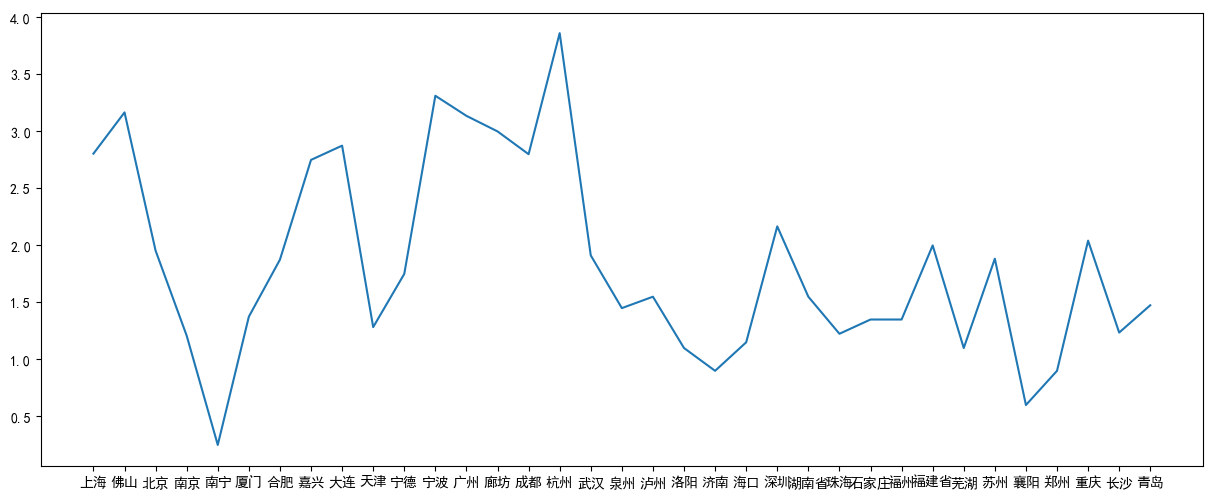

In [29]:
plt.figure(figsize=(15,6),dpi=100)
plt.plot(xz)

# 薪资和工作年限的关系

In [30]:
df.groupby(by='experience_required')['salary'].value_counts()

experience_required  salary    
10年以上经验              2.5-3.5万/月     3
                     3-4万/月         3
                     3-5万/月         3
                     2.5-3万/月       2
                     3.5-5万/月       2
                     4-5万/月         2
                     1.5-3万/月       1
                     2-3千/月         1
                     2.5-4万/月       1
                     3-3.9万/月       1
                     5-10万/月        1
                     7-9万/月         1
1年经验                 0.8-1万/月      37
                     1-2万/月        36
                     1-1.5万/月      32
                     0.8-1.5万/月    18
                     6-8千/月        15
                     1.5-3万/月      14
                     1.5-2万/月      13
                     2-4万/月        13
                     1.5-2.5万/月    12
                     0.6-1.2万/月    11
                     0.6-1万/月      11
                     0.8-1.2万/月     9
                     0.8-1.6万/月     6
                  

In [31]:
x = pd.pivot_table(df2,index = ['experience_required'],values=["salary"],aggfunc='mean').sort_values('salary')
x

,salary
experience_required,
1年经验,1.417923
2年经验,1.725072
无工作经验,1.750233
3-4年经验,2.109183
5-7年经验,2.703686
8-9年经验,2.830476
10年以上经验,3.771429


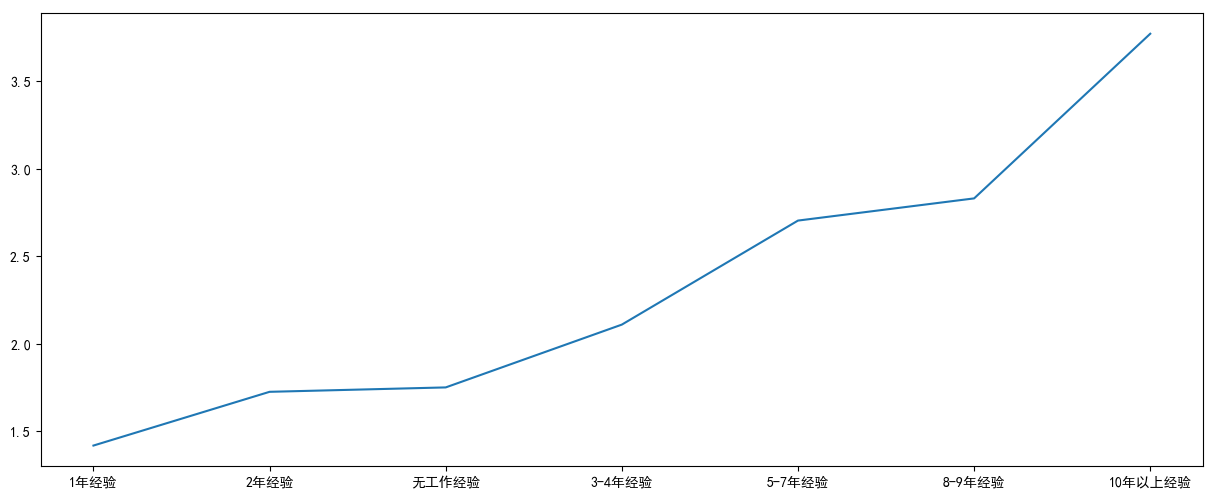

In [32]:
plt.figure(figsize=(15,6),dpi=100)
plt.plot(x)

# 学历和薪资的关系

In [33]:
df3=df2[~df2.edu_required.str.startswith('招')]
df3

,title,company_name,salary,company_site,experience_required,edu_required,release_time,company_welfare,job_info,company_location,company_info
2,Python开发工程师,北京万维盈创科技发展有限公司,1.150000,北京,无工作经验,本科,12-06发布,"['年终奖金', '员工旅游', '定期体检', '专业培训', '交通补贴', '通讯补贴...","['岗位职责：', '1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划；', '2....",'北七家镇TBD云集中心',北京万维盈创科技发展有限公司（简称万维盈创）是一家专业的环保物联网产品与解决方案提供商。公司...
3,Python开发工程师,北京学神科技有限公司,1.250000,北京,3-4年经验,大专,12-06发布,"['弹性工作', '年终奖金', '绩效奖金', '专业培训', '周末双休']","['', '岗位职责：', '1.围绕项目开展教学工作；', '2.给学生讲授知识点技术点以...",'昌平南邵',“学神IT教育”（网址：www.xuegod.cn）是北京学神科技有限公司旗下的在线教育品牌...
4,Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066),北京融联世纪信息技术有限公司,4.000000,北京,无工作经验,本科,12-06发布,[],"['1.负责RC系统整体规划工作,负责团队工作；2.负责风控系统在线服务的设计、优化和研发工...",'时代网络大厦',融360（www、rong360、com）北京融联世纪信息技术有限公司，成立于2011年10...
5,全栈python开发工程师,北京道冲泰科科技有限公司,1.458333,北京,5-7年经验,本科,12-06发布,"['五险一金', '补充医疗保险', '员工旅游', '交通补贴', '餐饮补贴', '通讯...","['工作描述:', '*为桥梁、隧道、地铁等施工建设过程开发安全监测web平台', '*为公...",'北京市朝阳区酒仙桥中路26号鸿运大厦801',北京道冲泰科科技有限公司（DCTK）是欧美大地科技集团（ETG）旗下的一家以研发和生产土木工...
6,Python高级开发工程师,叠云（北京）科技股份有限公司,1.350000,北京,无工作经验,本科,12-06发布,"['五险一金', '定期体检', '周末双休']","['岗位职责：', '1、进行电子教室后台部分研发', '2、进行云端运维系统的研发', '...",'朝阳区北苑天畅园6号楼23层',"叠云（北京）科技股份有限公司（股票代码：871400,简称：叠云股份)是联想集团直接投资专注..."
7,Python高级开发工程师,南京高泰科技有限公司,2.250000,北京,5-7年经验,本科,12-06发布,"['五险一金', '员工旅游', '餐饮补贴', '通讯补贴', '定期体检', '周末双休...","['1.5年以上开发经验，基本功扎实，精通Java；', '2.5年以上Linux经验，熟练...",'北京市石景山区苹果园街道八大处路45号点石商务公园8号楼7楼',我公司成立于2003年12月，是专业从事电信类软件开发和系统集成项目的科技型企业。公司拥有一...
8,Python开发工程师(石家庄）,北京慧铭软件有限公司,0.900000,石家庄,3-4年经验,大专,12-06发布,"['五险一金', '餐饮补贴', '专业培训', '绩效奖金', '年终奖金', '弹性工作']","['', 'Python', '岗位职责：', '1、负责运维自动化、监控、数据分析平台的开...",'河北省石家庄市裕华区昆仑大街89号中国移动通信',北京慧铭软件有限公司成立于2014年，公司专注于信息技术服务管理应用软件产品的策划、设计、研...
9,Python开发工程师-ZH,北京四维图新科技股份有限公司,3.000000,北京,5-7年经验,本科,12-06发布,"['五险一金', '补充医疗保险', '免费班车', '员工旅游', '专业培训', '餐饮...","['岗位职责：', '1、负责公司内部管理后台及商业化应用产品的开发；', '2、负责项目文...",'北京市海淀区永丰路与北清路交汇处四维图新大厦',北京四维图新科技股份有限公司（简称：四维图新，深交所股票代码：002405）是中国领先的数字...
10,Python开发工程师,中国广视索福瑞媒介研究有限责任公司,1.750000,北京,3-4年经验,本科,12-06发布,"['五险一金', '定期体检']","['', '', '**工作职责**', '', '1Web系统开发和维护；', '', '...",'建国路甲92号世茂大厦24层',中国广视索福瑞媒介研究(CSM)是国内领先的广播电视受众研究机构，是央视市场研究(CTR)与...
11,Python高级开发工程师,北京棣南新宇科技有限公司,1.750000,北京,3-4年经验,本科,12-06发布,"['五险一金', '补充医疗保险', '专业培训', '绩效奖金', '年终奖金', '定期...",['\n职能类别：\n\r\n\t\t\t\t\t\t\t\t\t\t互联网软件开发工程师\...,'知春路108号豪景大厦A座1401室',――公司简介――棣南公司，是一家认真做产品的软件公司，拥有非常丰富的自主研发经验。公司自19...


In [34]:
df3.groupby(by='edu_required')['salary'].value_counts()

edu_required  salary  
中专            1.250000      2
              0.750000      1
              0.900000      1
              1.750000      1
初中及以下         0.525000      1
              2.000000      1
              2.750000      1
博士            2.250000      4
              1.250000      3
              3.000000      2
              0.250000      1
              1.500000      1
              1.750000      1
              2.500000      1
              2.750000      1
              3.500000      1
              3.750000      1
              4.250000      1
大专            1.250000    101
              0.900000     37
              1.500000     33
              1.750000     30
              1.150000     24
              0.700000     20
              2.000000     18
              2.250000     13
              2.500000     12
              1.000000     11
              0.600000     10
              0.800000      8
                         ... 
硕士            3.333333      2
              3.5

In [35]:
y = pd.pivot_table(df3,index = ['edu_required'],values=["salary"],aggfunc='mean').sort_values('salary')
y

,salary
edu_required,
中专,1.180000
大专,1.408477
初中及以下,1.758333
本科,2.036254
硕士,2.146745
博士,2.294118


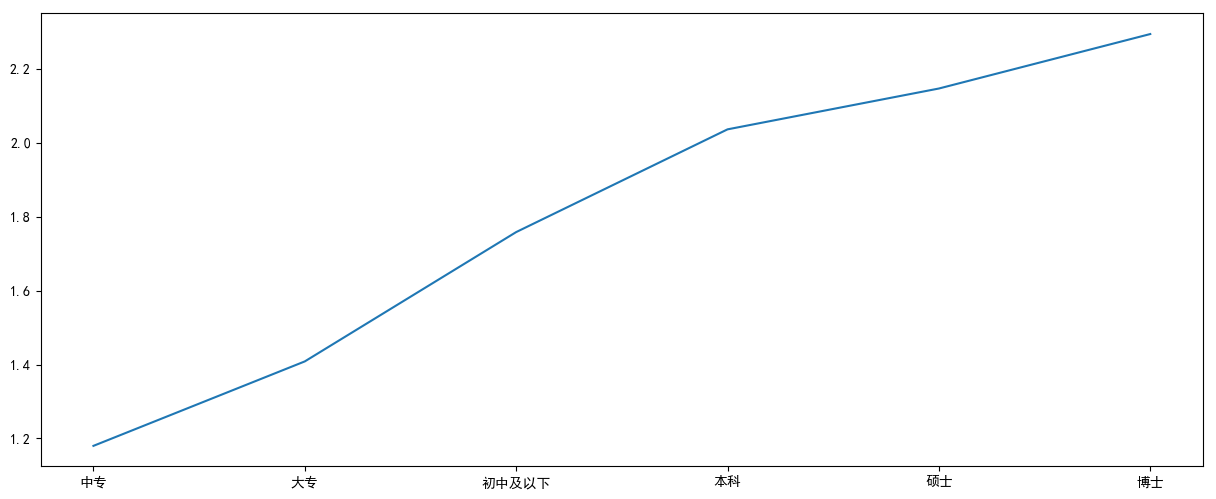

In [36]:
plt.figure(figsize=(15,6),dpi=100)
plt.plot(y)